In [32]:
from testproblems import generate_random_prob, random_problem_with_artifacts
from datastructures.operators import invert_edges, sort_scc, reformulate
from datastructures.rendering import render_incidence
from datastructures.tearing import min_arc_set_assign,dir_graph
from datastructures.graphutils import edges_to_Ein_Eout, sources
from datastructures.polycasebuilder import eqv_to_edges_tree
import networkx as nx
import numpy as np
from itertools import chain

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [36]:
m = 3
n = 5
seed = 10
sparsity = 1.
runs = (
    (0.5, 'sparsity_half.png'),
    (1., 'sparsity_one.png'),
    (1.5, 'sparsity_one_and_half.png')
)
sparsity, figname = runs[1]

In [37]:
kwargs = random_problem_with_artifacts(m,n,seed,sparsity)

In [38]:
eq_incidence,outset,eqnidxs,edges_varonleft,varidxs = map(kwargs.get, ["eq_incidence","outset","eqnidxs","edges_varonleft","varidxs"])

In [39]:
edges_default,tree_default,new_outset = eqv_to_edges_tree(eq_incidence, outset, len(eqnidxs))

In [40]:
edges_undir,tree_undir,_ = eqv_to_edges_tree(eq_incidence, n_eqs=m)
edges_dir,tree_dir,outset_adj = eqv_to_edges_tree(eq_incidence, outset, n_eqs=m)
tree_undir[2].update({val:1 for val in outset_adj.values()})

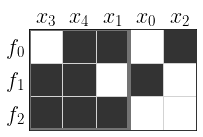

In [41]:
render_incidence(edges_undir, tree_undir, figname='defense_synthetic_noobj.png', save=True, figsize=((3,3)), fontsize=22, rotation=0, hideticks=True, patchwidth=4);

In [12]:
xsol, m = min_arc_set_assign(edges_varonleft, varidxs, eqnidxs)
outset_opt = dict((right, left) for left, right in edges_varonleft if xsol[left, right] > 0.5)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-02-25


In [13]:
edges_opt,tree_opt,new_outset_opt = eqv_to_edges_tree(eq_incidence, outset_opt, len(eqnidxs))

In [14]:
inputids = sources(*edges_to_Ein_Eout(edges_opt))

In [15]:
D = nx.DiGraph(dir_graph(edges_varonleft, eqnidxs, outset.items()))
tree_opt = [{elt:2 for elt in chain(*sort_scc(D, lambda x: x in eqnidxs))},{2:1},{v:1 for v in inputids}]

In [16]:
newidx = 'obj'

In [17]:
edges_opt[0][newidx] = tuple(inputids)
edges_opt[1][newidx] = (None,)
tree_opt[0][newidx] = 2

In [18]:
tree_opt

[{0: 2, 1: 2, 2: 2, 'obj': 2}, {2: 1}, {2: 1, 4: 1}]

In [33]:
formulation_opt = reformulate(edges_opt, tree_opt, root_solver_name=1)

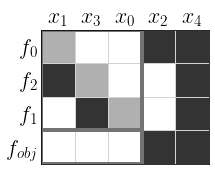

In [34]:
render_incidence(*formulation_opt, figname="defense_synthetic_opt.png", save=True, figsize=((3,3)), fontsize=22, rotation=0, hideticks=True, patchwidth=4);

In [22]:
tree_default = ({elt:2 for elt in eqnidxs},{2:1},{v:1 for v in inputids})
edges_default[0][newidx] = tuple(inputids)
edges_default[1][newidx] = (None,)

In [23]:
tree_default[0][newidx] = 2

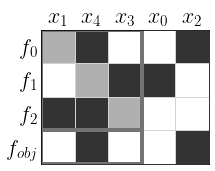

In [24]:
render_incidence(edges_default, tree_default, figname="defense_synthetic_init.png", save=True, figsize=((3,3)), fontsize=22, rotation=0, hideticks=True, patchwidth=4);